###
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

###

In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime

#Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
import pycountry
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins

# Image
import numpy as np
from PIL import Image

# Animation
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

# Graphics in retina format 
%config InlineBackend.figure_format = 'retina' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5


# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [12]:
df = pd.read_csv(r"C:\Users\bmthm\Downloads\house-prices-advanced-regression-techniques\train.csv")

In [13]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [14]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
df.shape

(1460, 81)

#Missing values treatment

In [16]:
miss_val = df.isnull().sum()
miss_val

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [17]:
miss_val_percent = 100 * df.isnull().sum() /len(df)
miss_val_table = pd.concat([miss_val,miss_val_percent],axis = 1)

In [18]:
miss_val_table

,0,1
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,17.739726
LotArea,0,0.000000
...,...,...
MoSold,0,0.000000
YrSold,0,0.000000
SaleType,0,0.000000
SaleCondition,0,0.000000


In [19]:
miss_val_table_new = miss_val_table.rename(columns = {0 : 'Missing Values count', 1 : '% of Total Values'})
miss_val_table_new.sort_values("Missing Values count")

,Missing Values count,% of Total Values
Id,0,0.000000
TotalBsmtSF,0,0.000000
Heating,0,0.000000
SaleCondition,0,0.000000
CentralAir,0,0.000000
...,...,...
FireplaceQu,690,47.260274
Fence,1179,80.753425
Alley,1369,93.767123
MiscFeature,1406,96.301370


In [20]:
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Handling the missing values

In [21]:
df_new = df.copy()

In [22]:
df_new

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [23]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [24]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

df_new.iloc[:,:] = imputer.fit_transform(df_new)

In [25]:
df_new.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [26]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [27]:
miss_val_df_new = df_new.isnull().sum()
miss_val_percent_df_new = 100 * df_new.isnull().sum() /len(df)
miss_val_table_df_new = pd.concat([miss_val_df_new,miss_val_percent_df_new],axis = 1)

In [28]:
miss_val_table_df_new = miss_val_table.rename(columns = {0 : 'Missing Values count', 1 : '% of Total Values'})
miss_val_table_df_new.sort_values("Missing Values count")

,Missing Values count,% of Total Values
Id,0,0.000000
TotalBsmtSF,0,0.000000
Heating,0,0.000000
SaleCondition,0,0.000000
CentralAir,0,0.000000
...,...,...
FireplaceQu,690,47.260274
Fence,1179,80.753425
Alley,1369,93.767123
MiscFeature,1406,96.301370


In [29]:
df_new.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [30]:
for i in df_new.columns:
    print(df_new[i].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [31]:
df_new.describe(include='float').round(1)

,LotFrontage,MasVnrArea,GarageYrBlt
count,1460.0,1460.0,1460.0
mean,68.3,103.1,1980.0
std,22.4,180.7,24.7
min,21.0,0.0,1900.0
25%,60.0,0.0,1962.0
50%,63.0,0.0,1984.5
75%,79.0,164.2,2003.0
max,313.0,1600.0,2010.0


In [32]:
df_new.describe(include='object').round(1)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,1419,925,1311,1459,1052,1382,225,1260,...,951,686,1392,1407,1340,1456,1336,1455,1267,1198


In [33]:
df_new.describe(include='int64').round(1)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,730.5,56.9,10516.8,6.1,5.6,1971.3,1984.9,443.6,46.5,567.2,...,94.2,46.7,22.0,3.4,15.1,2.8,43.5,6.3,2007.8,180921.2
std,421.6,42.3,9981.3,1.4,1.1,30.2,20.6,456.1,161.3,441.9,...,125.3,66.3,61.1,29.3,55.8,40.2,496.1,2.7,1.3,79442.5
min,1.0,20.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,34900.0
25%,365.8,20.0,7553.5,5.0,5.0,1954.0,1967.0,0.0,0.0,223.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,129975.0
50%,730.5,50.0,9478.5,6.0,5.0,1973.0,1994.0,383.5,0.0,477.5,...,0.0,25.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,163000.0
75%,1095.2,70.0,11601.5,7.0,6.0,2000.0,2004.0,712.2,0.0,808.0,...,168.0,68.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,214000.0
max,1460.0,190.0,215245.0,10.0,9.0,2010.0,2010.0,5644.0,1474.0,2336.0,...,857.0,547.0,552.0,508.0,480.0,738.0,15500.0,12.0,2010.0,755000.0


In [34]:
df_new.cov().round(1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,177755.0,199.0,-117.8,-139819.7,-16.5,5.9,-161.9,-191.5,-3891.5,-966.1,...,-1566.5,-13.3,74.5,-576.4,31.3,966.3,-1305.7,24.1,0.4,-7.340732e+05
MSSubClass,199.0,1789.3,-330.2,-59017.4,1.9,-2.8,35.6,35.4,180.2,-1347.4,...,-66.7,-17.1,-31.1,-54.3,-61.4,14.1,-161.2,-1.6,-1.2,-2.832337e+05
LotFrontage,-117.8,-330.2,499.8,62766.7,7.3,-1.4,72.5,40.3,703.6,2030.9,...,171.9,194.7,19.6,37.9,46.0,159.9,-136.1,0.8,0.1,5.847103e+05
LotArea,-139819.7,-59017.4,62766.7,99625649.7,1460.5,-62.6,4289.1,2841.3,186382.7,974690.8,...,214800.6,56062.5,-11188.1,5976.2,24020.0,31148.2,188508.7,32.5,-189.1,2.092111e+08
OverallQual,-16.5,1.9,7.3,1460.5,1.9,-0.1,23.9,15.7,101.8,151.2,...,41.4,28.3,-9.6,1.2,5.0,3.6,-21.5,0.3,-0.1,8.690410e+04
OverallCond,5.9,-2.8,-1.4,-62.6,-0.1,1.2,-12.6,1.7,-25.3,-23.5,...,-0.5,-2.4,4.8,0.8,3.4,-0.1,38.0,-0.0,0.1,-6.882700e+03
YearBuilt,-161.9,35.6,72.5,4289.1,23.9,-12.6,912.2,369.7,1700.9,3437.0,...,851.3,377.6,-714.9,27.8,-84.8,6.0,-515.2,1.0,-0.5,1.254637e+06
YearRemodAdd,-191.5,35.4,40.3,2841.3,15.7,1.7,369.7,426.2,658.7,1209.5,...,532.4,309.5,-244.7,27.4,-44.6,4.8,-105.4,1.2,1.0,8.317079e+05
MasVnrArea,-3891.5,180.2,703.6,186382.7,101.8,-25.3,1700.9,658.7,32663.8,21535.7,...,3624.2,1467.2,-1214.0,101.4,627.3,86.6,-2646.2,-3.3,-2.0,6.785682e+06
BsmtFinSF1,-966.1,-1347.4,2030.9,974690.8,151.2,-23.5,3437.0,1209.5,21535.7,208025.5,...,11679.5,3377.3,-2851.8,353.7,1577.2,2574.5,808.2,-19.4,8.7,1.400137e+07


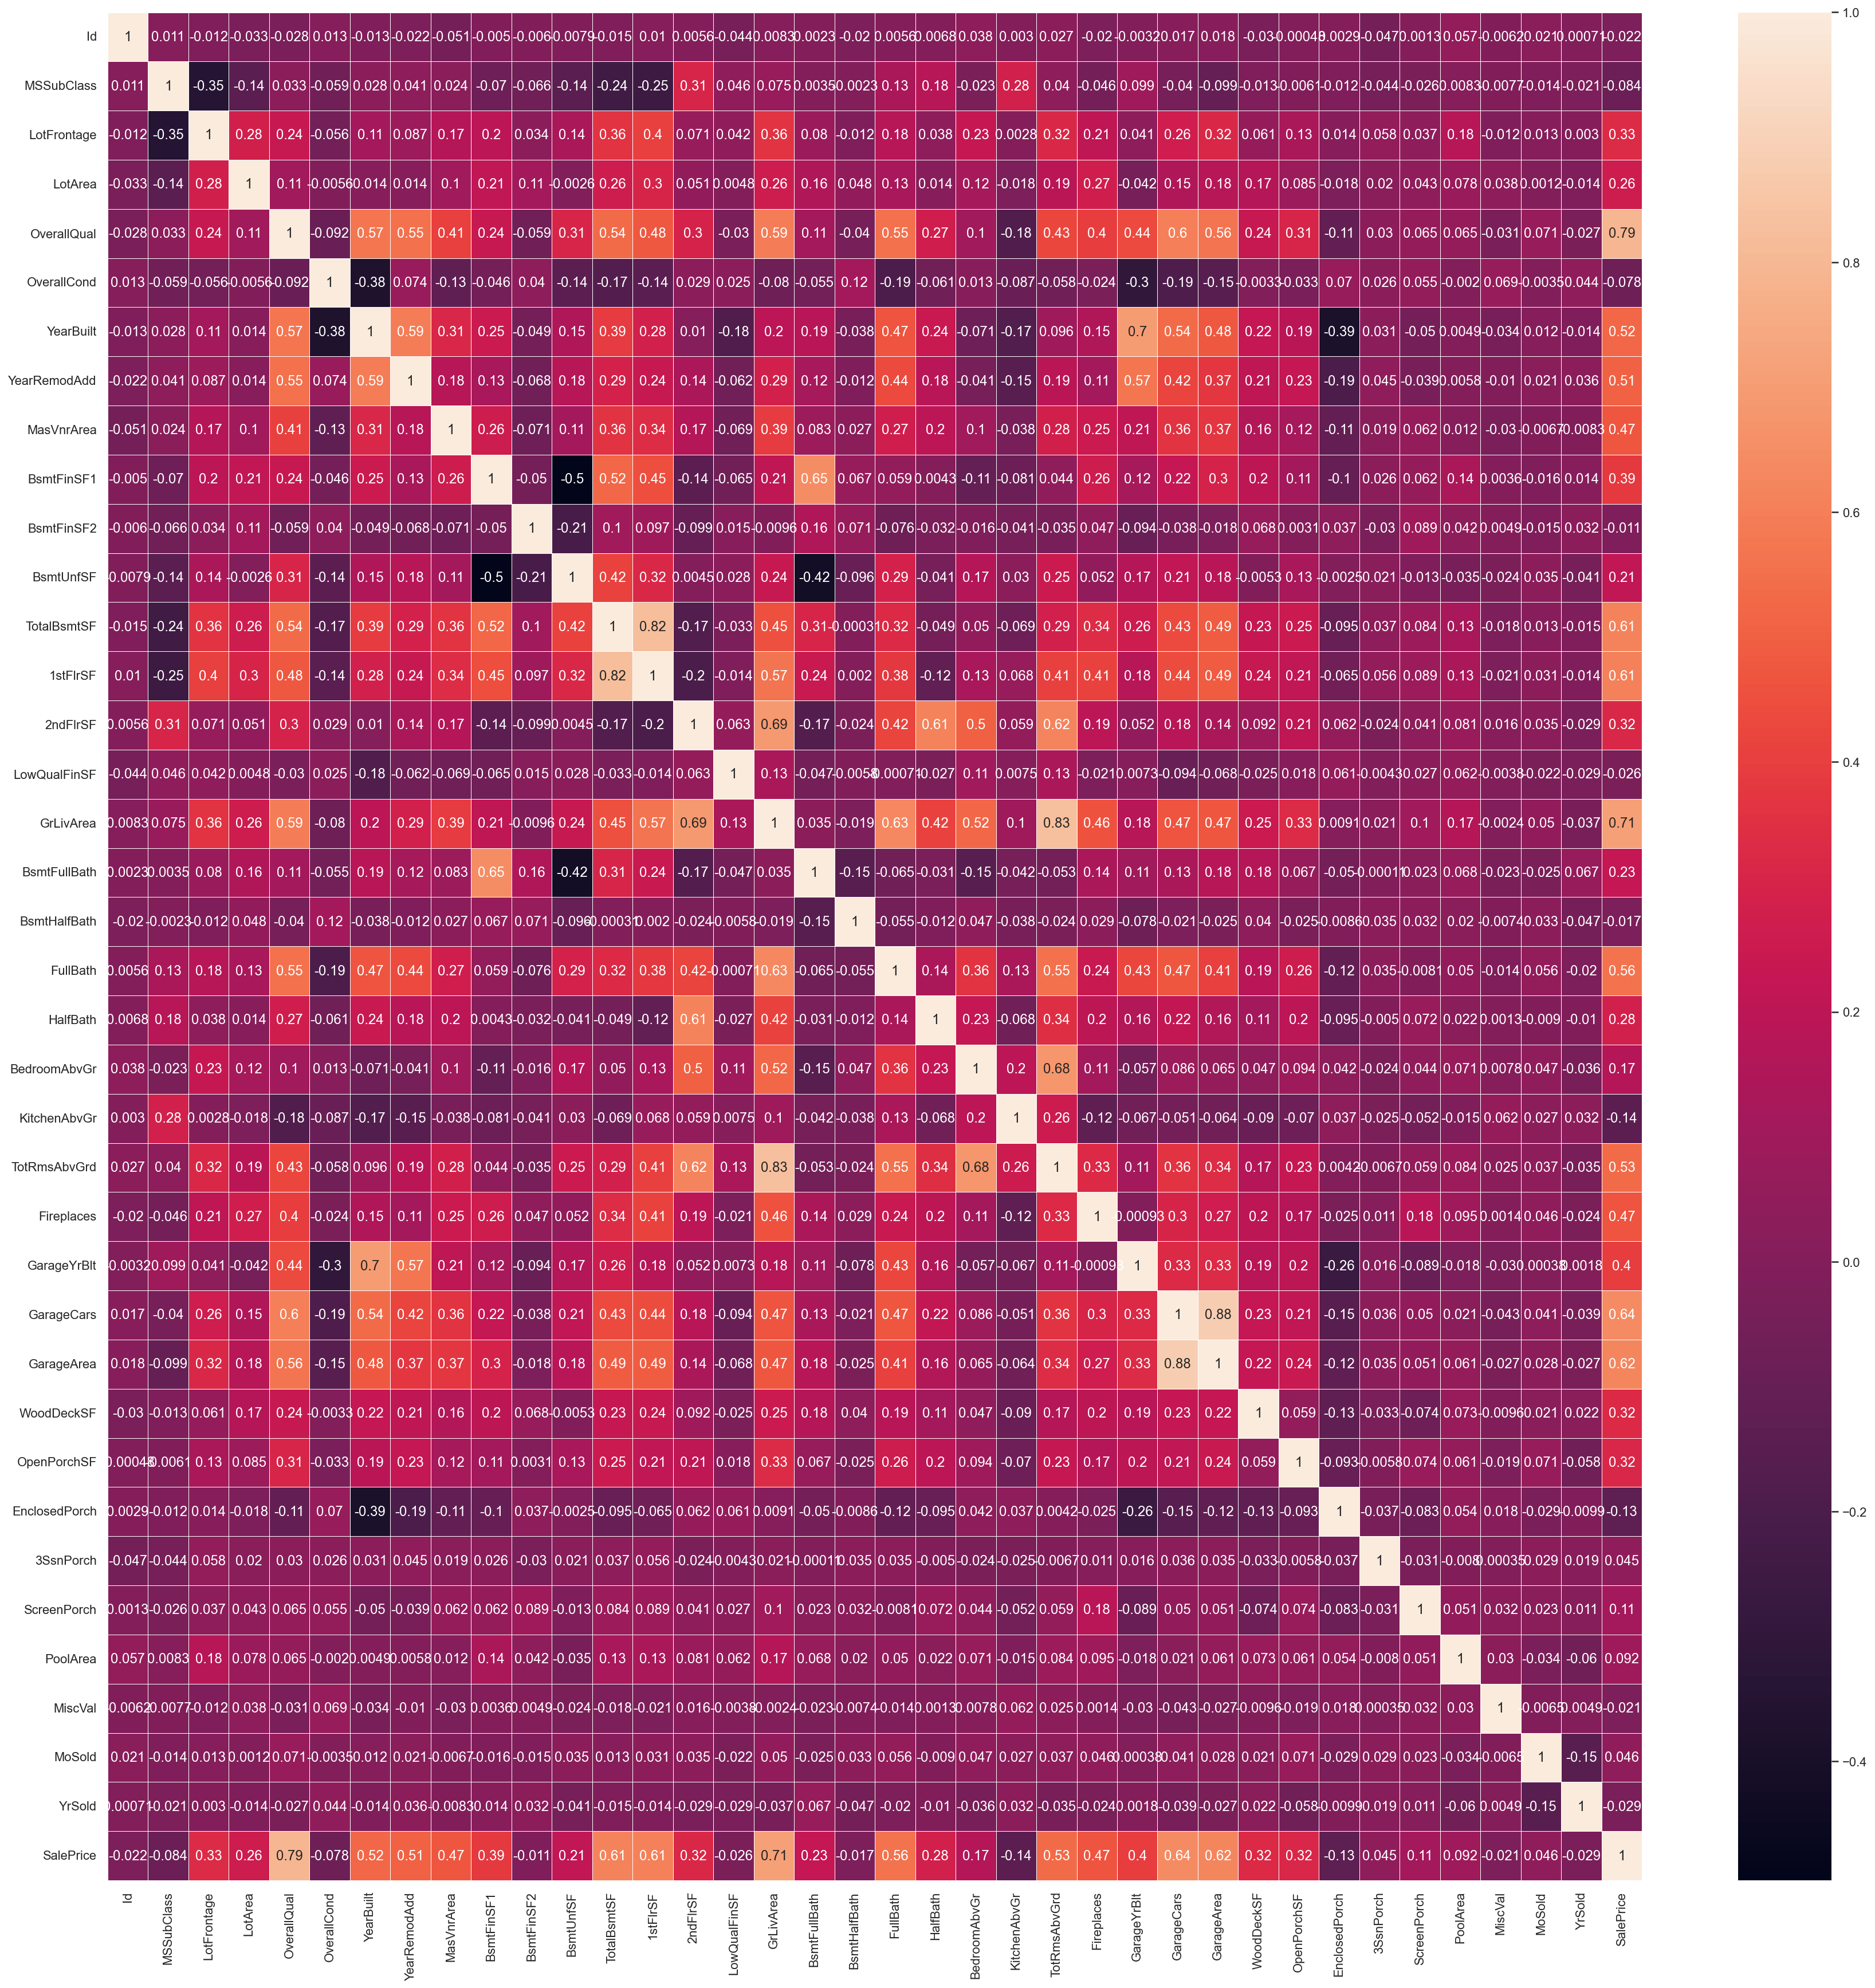

In [35]:
import seaborn as sns
 
# checking correlation using heatmap
#Loading dataset

 
#plotting the heatmap for correlation
fig, ax = plt.subplots(figsize=(30,30))
ax = sns.heatmap(df_new.corr(), annot=True,linewidth=.5)

In [36]:
integer_columns = df_new.select_dtypes(include=['int64']).columns
float_columns = df_new.select_dtypes(include=['float64']).columns
object_columns = df_new.select_dtypes(include=['object']).columns

In [37]:
corr = df_new.corr(method='pearson').round(decimals=2)
corr.loc[:,'SalePrice'].apply(func=abs).sort_values(ascending=False)

SalePrice        1.00
OverallQual      0.79
GrLivArea        0.71
GarageCars       0.64
GarageArea       0.62
TotalBsmtSF      0.61
1stFlrSF         0.61
FullBath         0.56
TotRmsAbvGrd     0.53
YearBuilt        0.52
YearRemodAdd     0.51
Fireplaces       0.47
MasVnrArea       0.47
GarageYrBlt      0.40
BsmtFinSF1       0.39
LotFrontage      0.33
OpenPorchSF      0.32
WoodDeckSF       0.32
2ndFlrSF         0.32
HalfBath         0.28
LotArea          0.26
BsmtFullBath     0.23
BsmtUnfSF        0.21
BedroomAbvGr     0.17
KitchenAbvGr     0.14
EnclosedPorch    0.13
ScreenPorch      0.11
PoolArea         0.09
MSSubClass       0.08
OverallCond      0.08
MoSold           0.05
3SsnPorch        0.04
LowQualFinSF     0.03
YrSold           0.03
BsmtHalfBath     0.02
MiscVal          0.02
Id               0.02
BsmtFinSF2       0.01
Name: SalePrice, dtype: float64

In [38]:
integer_columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [39]:
float_columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [40]:
object_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [41]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [42]:
df_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [43]:
x = df_new.drop('SalePrice',axis='columns')

y = df_new['SalePrice']

In [44]:
x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal


In [45]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [46]:
x_cat = x.select_dtypes(include='object')

In [47]:
x_cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,RL,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,RL,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,RL,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1456,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1457,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,Gd,GdPrv,Shed,WD,Normal
1458,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [48]:
x_cont = x.select_dtypes(include='number')

In [49]:
x_cont

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,500,349,0,0,0,0,0,0,2,2010
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,252,0,60,0,0,0,0,2500,5,2010
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,240,366,0,112,0,0,0,0,4,2010


In [50]:
x_cat.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,1419,925,1311,1459,1052,1382,225,1260,...,951,686,1392,1407,1340,1456,1336,1455,1267,1198


In [51]:
x_cont.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,68.267123,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,22.356355,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
vif_data = pd.DataFrame()
vif_data["feature"] = x_cont.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_cont.values, i)
                          for i in range(len(x_cont.columns))]
  
print(vif_data)

          feature           VIF
0              Id  4.112053e+00
1      MSSubClass  4.628806e+00
2     LotFrontage  1.574179e+01
3         LotArea  2.632715e+00
4     OverallQual  6.672154e+01
5     OverallCond  4.187446e+01
6       YearBuilt  1.996137e+04
7    YearRemodAdd  2.237657e+04
8      MasVnrArea  1.849224e+00
9      BsmtFinSF1           inf
10     BsmtFinSF2           inf
11      BsmtUnfSF           inf
12    TotalBsmtSF           inf
13       1stFlrSF           inf
14       2ndFlrSF           inf
15   LowQualFinSF           inf
16      GrLivArea           inf
17   BsmtFullBath  3.695100e+00
18   BsmtHalfBath  1.218823e+00
19       FullBath  2.670202e+01
20       HalfBath  3.421788e+00
21   BedroomAbvGr  3.104900e+01
22   KitchenAbvGr  3.765553e+01
23   TotRmsAbvGrd  8.354902e+01
24     Fireplaces  3.017489e+00
25    GarageYrBlt  1.613026e+04
26     GarageCars  3.763194e+01
27     GarageArea  3.147618e+01
28     WoodDeckSF  1.906914e+00
29    OpenPorchSF  1.827687e+00
30  Encl

In [62]:
from sklearn.preprocessing import LabelEncoder
label_encoders={}
le=LabelEncoder()
for i in df_new.columns:
    if df_new[i].dtype=="object":
        label_encoders[i] = LabelEncoder()
        df_new[i] = label_encoders[i].fit_transform(df[i])
    
    print(i)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


In [63]:
df_new

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,3,4,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,3,2,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,3,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,142125


In [64]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [65]:
corr = df_new.corr(method='pearson').round(decimals=2)
corr.loc[:,'SalePrice'].apply(func=abs).sort_values(ascending=False)

SalePrice       1.00
OverallQual     0.79
GrLivArea       0.71
GarageCars      0.64
ExterQual       0.64
                ... 
Condition2      0.01
BsmtFinSF2      0.01
BsmtFinType2    0.01
Utilities       0.01
GarageQual      0.01
Name: SalePrice, Length: 81, dtype: float64

In [66]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [67]:
x = df_new.drop('SalePrice',axis='columns')

y = df_new['SalePrice']

In [68]:
x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,0,3,4,4,0,2,2008,8,4
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,0,3,4,4,0,5,2007,8,4
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,0,3,4,4,0,9,2008,8,4
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,0,3,4,4,0,2,2006,8,0
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,0,3,4,4,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,0,3,4,4,0,8,2007,8,4
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,0,3,2,4,0,2,2010,8,4
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,0,3,0,2,2500,5,2010,8,4
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,0,3,4,4,0,4,2010,8,4


In [69]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [71]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.8547958051551816

In [74]:
Y_pred = reg.predict(x)

In [75]:
Y_pred

array([216381.52944258, 201319.35121793, 218772.59781671, ...,
       243614.53396172, 149450.48178761, 157627.15483024])

In [76]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64